<h1>Chipotle Data Analysis</h1>
Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import squarify
import warnings

In [2]:
warnings.filterwarnings("ignore")

<b>Defining Functions</b>

In [3]:
def marking_units(quantity) :
    if quantity <= 0 :
        return 0
    if quantity >= 1 :
        return 1

Reading Data from a CSV file..

In [4]:
data = pd.read_csv("C:/Users/rrs140/Documents/Chipotle/chipotle/chipotle.tsv" , sep ="\t")

In [5]:
print("\n\t-----\tEntire Dataset.\t-----\t\n")
print(data)


	-----	Entire Dataset.	-----	

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
5            3         1                           Chicken Bowl   
6            3         1                          Side of Chips   
7            4         1                          Steak Burrito   
8            4         1                       Steak Soft Tacos   
9            5         1                          Steak Burrito   
10           5         1                    Chips and Guacamole   
11           6         1                   Chicken Crispy Tacos   
12           6         1                     Chicken Soft Tacos   
13           7         1      

Removing "$" sign from the price coloumn

In [6]:
data['item_price'] = data['item_price'].str.replace('$','')

Converting price to a Float

In [7]:
data['item_price'] =  data['item_price'].astype(float) 

If you observe the data, a few items have missing item descriptions,
Thus we will populate them with their respective item names..

In [8]:
data['items'] = data['item_name']
data['items'] = data['items'].str.replace('and',',')
for i in range(len(data['order_id'])):
    if pd.isnull(data['choice_description'][i]):
        data['choice_description'][i] = str('['+data['items'][i]+']')

In [9]:
print("\n\t-----\tDataset After Cleaning\t-----\t\n")
print(data)


	-----	Dataset After Cleaning	-----	

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
5            3         1                           Chicken Bowl   
6            3         1                          Side of Chips   
7            4         1                          Steak Burrito   
8            4         1                       Steak Soft Tacos   
9            5         1                          Steak Burrito   
10           5         1                    Chips and Guacamole   
11           6         1                   Chicken Crispy Tacos   
12           6         1                     Chicken Soft Tacos   
13           7         

Finding popular items

In [10]:
popular_items = data.groupby(data['item_name'])['item_name'].count()
print("\n\t-----\tDisplaying Quantities of Menu Items sold.\t-----\t\n")
print(popular_items.sort_values(ascending = False))


	-----	Displaying Quantities of Menu Items sold.	-----	

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink               

The menu items in chipotle can be broadly divided in 6 categories : 
We shall divide all the orders into these 6 categories.

In [11]:
data['item_name'] = data['item_name'].astype(str)
df = pd.DataFrame(data)
bowls_count = burritos_count = chips_count = drinks_count = salad_count = tacos_count = other = 0

<b>Categorizing the orders :</b>

In [12]:
for i in range(len(data['order_id'])) :
    if df['item_name'][i].find("Bowl") > -1:
        bowls_count += 1
    elif df['item_name'][i].find("Burrito") > -1:
        burritos_count += 1
    elif df['item_name'][i].find("Chips") > -1:
        chips_count += 1
    elif df['item_name'][i].find("Drink") > -1 or  df['item_name'][i].find("Water") > -1 or df['item_name'][i].find("Izze") > -1 or        df['item_name'][i].find("Nectar") > -1  or df['item_name'][i].find("Soda") > -1:
        drinks_count += 1
        #print(df['item_name'][i],"\t",drinks_count)
    elif df['item_name'][i].find("Salad") > -1:
        salad_count += 1
    elif df['item_name'][i].find("Tacos") > -1:
        tacos_count += 1
    else:
        other +=1
        print(df['item_name'][i],"\t",other)

In [13]:
Names = ['Bowls','Burritos','Tacos','Chips','Salads','Drinks']
Total = [bowls_count,burritos_count,tacos_count,chips_count,salad_count,drinks_count]
Table = pd.DataFrame({'Item Name': Names,'Total': Total,})
print("\n\t-----\tCategorizing the orders.\t-----\t\n")
print(Table.sort_values(by = 'Total', ascending = False))


	-----	Categorizing the orders.	-----	

  Item Name  Total
0     Bowls   1331
1  Burritos   1172
3     Chips   1084
5    Drinks    668
2     Tacos    345
4    Salads     22


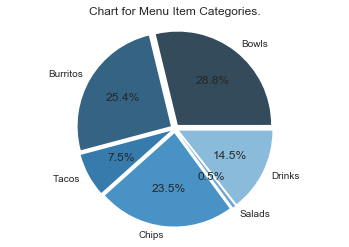

In [14]:
sb.set_style("white")
sb.set_context("notebook")
col = sb.color_palette("Blues_d")
explode = (0.05,0.05,0.05,0.05,0.05,0.05)

figure, axis_pie = plt.subplots()
axis_pie.pie(Table['Total'],explode =explode, labels=Table['Item Name'], autopct='%1.1f%%', colors = col)
axis_pie.axis('equal') 
plt.title("Chart for Menu Item Categories.")
plt.show()

<h2> BOWLS </h2>
Now we will look
further into Bowls. We will find the most popular bowls.

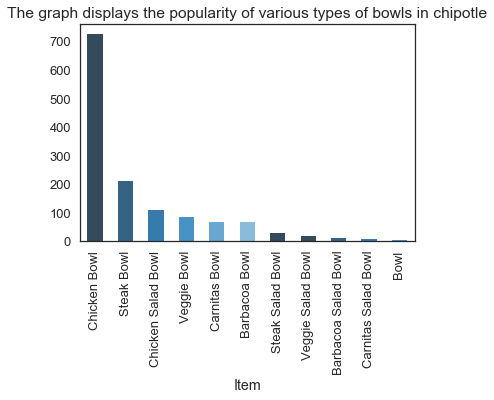

In [15]:
bowls = []

for i in range(len(df)) :
    if df['item_name'][i].find("Bowl") > -1:
        bowls.append(df['item_name'][i])

bowls_df = pd.DataFrame(bowls)
bowls_df.rename(columns={0:'Item'},inplace = True)


sb.set_style("white")
sb.set_context("talk")

bowls_df1 = bowls_df.groupby('Item')['Item'].count()

with sb.color_palette("Blues_d"):bowls_df1.sort_values(ascending = False).plot(kind = 'bar')
plt.title("The graph displays the popularity of various types of bowls in chipotle")
plt.show()

<b>The above graph displays the popularity of various types of bowls in chipotle</b>

<h2>Burritos</h2>
Now we will look further into Burritos. We will find the most popular burritos.

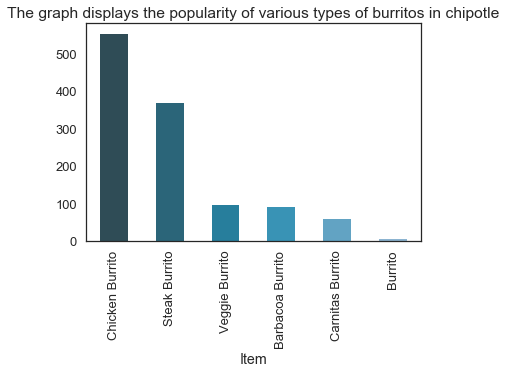

In [16]:
burritos = []

for i in range(len(df)) :
    if df['item_name'][i].find("Burrito") > -1:
        burritos.append(df['item_name'][i])

burritos_df = pd.DataFrame(burritos)
burritos_df.rename(columns={0:'Item'},inplace = True)


burritos_df1 = burritos_df.groupby('Item')['Item'].count()
with sb.color_palette("PuBuGn_d"):burritos_df1.sort_values(ascending = False).plot(kind = 'bar')
plt.title("The graph displays the popularity of various types of burritos in chipotle")
plt.show()

<b>The above graph displays the popularity of various types of burritos in chipotle</b>

<h2>Chips</h2>
Now we will look further into Chips. We will find the most popular chips & their sides.

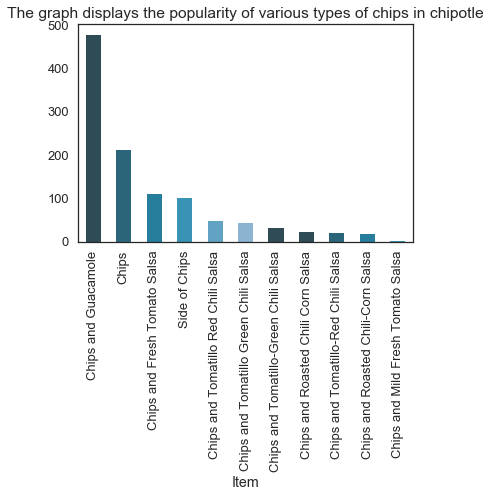

In [17]:
chips = []

for i in range(len(df)) :
    if df['item_name'][i].find("Chips") > -1:
        chips.append(df['item_name'][i])

chips_df = pd.DataFrame(chips)
chips_df.rename(columns={0:'Item'},inplace = True)

chips_df1 = chips_df.groupby('Item')['Item'].count()
with sb.color_palette("PuBuGn_d"):chips_df1.sort_values(ascending = False).plot(kind = 'bar')
plt.title("The graph displays the popularity of various types of chips in chipotle")
plt.show()

<b>The above graph displays the popularity of various types of chips in chipotle</b>

<h2>Salads</h2>
Now we will look further into Salads. We will find the most popular Salads

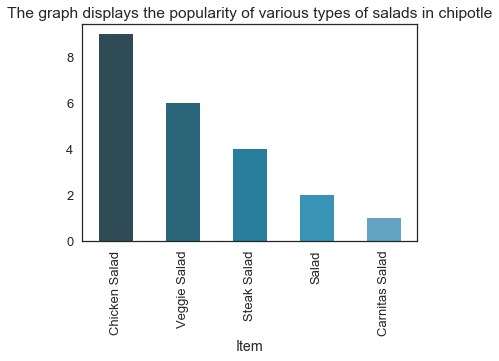

In [18]:
salads = []

for i in range(len(df)) :
    if df['item_name'][i].find("Bowl") > -1:
           continue
    elif df['item_name'][i].find("Salad") > -1:
        salads.append(df['item_name'][i])

salad_df = pd.DataFrame(salads)
salad_df.rename(columns={0:'Item'},inplace = True)

salad_df1 = salad_df.groupby('Item')['Item'].count()
with sb.color_palette("PuBuGn_d"):salad_df1.sort_values(ascending = False).plot(kind = 'bar')
plt.title("The graph displays the popularity of various types of salads in chipotle")
plt.show()

<b>The above graph displays the popularity of various types of salads in chipotle</b>

<h2>Tacos</h2>
Now we will look further into Tacos. We will find the most popular Tacos

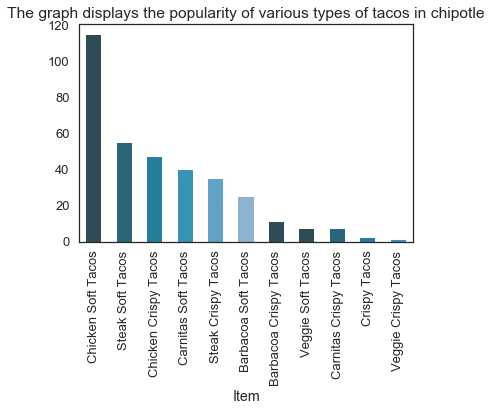

In [19]:
tacos = []

for i in range(len(df)) :
    if df['item_name'][i].find("Tacos") > -1:
        tacos.append(df['item_name'][i])

tacos_df = pd.DataFrame(tacos)
tacos_df.rename(columns={0:'Item'},inplace=True)

tacos_df1 = tacos_df.groupby('Item')['Item'].count()
with sb.color_palette("PuBuGn_d"):tacos_df1.sort_values(ascending = False).plot(kind = 'bar')
plt.title("The graph displays the popularity of various types of tacos in chipotle")
plt.show()

<b>The above graph displays the popularity of various types of tacos in chipotle</b>

<h2>Drinks</h2>
Now we will look further into Drinks. We will find the most popular Drinks

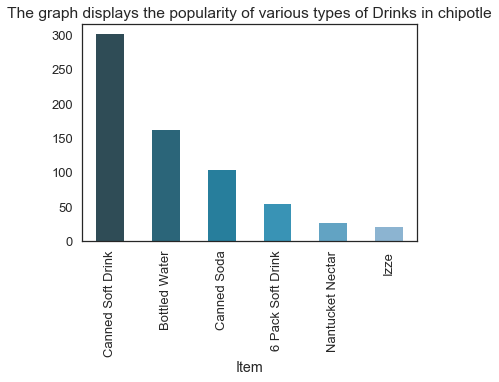

In [20]:
drinks = []
drink_types = []

for i in range(len(df)) :
    if df['item_name'][i].find("Drink") > -1 or  df['item_name'][i].find("Water") > -1 or df['item_name'][i].find("Izze") > -1 or        df['item_name'][i].find("Nectar") > -1  or df['item_name'][i].find("Soda") > -1:
        drinks.append(df['item_name'][i])
        if df['item_name'][i].find("Drink") > -1 :
            drink_types.append(df['choice_description'][i])

drinks_df = pd.DataFrame(drinks)
drinks_df.rename(columns={0:'Item'},inplace=True)
drinks_df1 = drinks_df.groupby('Item')['Item'].count()
with sb.color_palette("PuBuGn_d"):drinks_df1.sort_values(ascending = False).plot(kind = 'bar')  
plt.title("The graph displays the popularity of various types of Drinks in chipotle")
plt.show()

<b>The above graph displays the popularity of various types of Drinks in chipotle</b>

Canned Soft Drinks & Canned Sodas

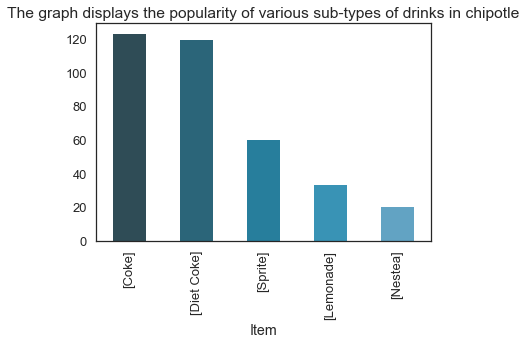

In [21]:
drinks_types = pd.DataFrame(drink_types)
drinks_types
drinks_types.rename(columns={0:'Item'},inplace=True)
drinks_types = drinks_types.groupby('Item')['Item'].count()
with sb.color_palette("PuBuGn_d"):drinks_types.sort_values(ascending = False).plot(kind = 'bar')
plt.title("The graph displays the popularity of various sub-types of drinks in chipotle")
plt.show()

<b>The above graph displays the popularity of various sub-types of drinks
 in chipotle</b>

<h2>Market Basket Analysis using association rules</h2>
Market Basket Analysis is popularly known for finding hidden patterns in big data sets. It is employed by retailers to find useful combinations from users buying habits. 
We will be using this analysis to find multiple insights in the Chipotle Data.

In [22]:
print("\n\t-----\tMarket Basket Analysis using association rules\t-----\t\n")


	-----	Market Basket Analysis using association rules	-----	



In [23]:
basket = df.groupby(['order_id','item_name'] )['quantity'].sum().unstack().reset_index().fillna(0).set_index('order_id')
basket.head()

item_name,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
basket_sets = basket.applymap(marking_units)
frequent_itemsets = apriori(basket_sets, min_support = 0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.20)
print("\n")
print("\n\t-----\tAssociation rules with values above Minimum Support(5%) and Minimum Confidence Threshold(20%).\t-----\t\n")
rules




	-----	Association rules with values above Minimum Support(5%) and Minimum Confidence Threshold(20%).	-----	



,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807
1,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568
2,(Chips and Guacamole),(Chicken Bowl),0.258451,0.335333,0.081243,0.314346,0.937416,-0.005424,0.969392
3,(Chicken Bowl),(Chips and Guacamole),0.335333,0.258451,0.081243,0.242276,0.937416,-0.005424,0.978653
4,(Chicken Burrito),(Chips and Guacamole),0.266630,0.258451,0.062159,0.233129,0.902022,-0.006752,0.966979
5,(Chips and Guacamole),(Chicken Burrito),0.258451,0.266630,0.062159,0.240506,0.902022,-0.006752,0.965603


Minimum support is being set at 5%. <br>
This is because of the size of the data.

<h4>Now will use association rules on ingridients, to determine their dependence on each other.</h4>

In [25]:
in_df = data
in_df['choice_description'] = data['choice_description'].str.replace('[','')
in_df['choice_description'] = data['choice_description'].str.replace(']','')

in_df['choice_description'] = in_df['choice_description'].astype(str)

in_list = []
for i in range(len(in_df)):
    in_list.append(in_df['choice_description'][i].split(","))
    
in_df = pd.DataFrame(in_list)
aa = []

for i in range(len(data)):
    ss = data['item_name'][i].split()
    ax = ss[0]
    aa.append(ax)

in_df['item_name'] = aa
print("\n")
print("\n\t-----\tAssociation rules on ingridients, to determine their dependence on each other.\t-----\t\n")
print(in_df)    
    




	-----	Association rules on ingridients, to determine their dependence on each other.	-----	

                                         0  \
0                                   Chips    
1                               Clementine   
2                                    Apple   
3                                   Chips    
4          Tomatillo-Red Chili Salsa (Hot)   
5                Fresh Tomato Salsa (Mild)   
6                            Side of Chips   
7                Tomatillo Red Chili Salsa   
8              Tomatillo Green Chili Salsa   
9                       Fresh Tomato Salsa   
10                                  Chips    
11                Roasted Chili Corn Salsa   
12                Roasted Chili Corn Salsa   
13                      Fresh Tomato Salsa   
14                                  Chips    
15                                  Chips    
16    Tomatillo-Green Chili Salsa (Medium)   
17               Fresh Tomato Salsa (Mild)   
18                           

In [26]:
in_df.rename(columns={0:'',1:'',2:'',3:'',4:'',5:'',6:'',7:'',8:'',9:''},inplace = True)

dummy = in_df.stack().reset_index()

for i in range(len(dummy)):
    dummy.loc[i,0] = dummy.loc[i,0].strip()
    stringParts = dummy.loc[i,0].split("-")
    dummy.loc[i,0] = " ".join(stringParts)

In [27]:
basket1 = dummy.groupby(['level_0',0] )[0].count().unstack().reset_index().fillna(0).set_index('level_0')
basket1.columns

frequent_itemsets1 = apriori(basket1, min_support = 0.06, use_colnames=True)
rules1 = association_rules(frequent_itemsets1, metric="conviction", min_threshold=4)
rules1

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Black Beans),(Rice),0.290350,0.516876,0.260277,0.896423,1.734311,0.110202,4.664408
1,(Sour Cream),(Cheese),0.370186,0.493509,0.329295,0.889538,1.802475,0.146604,4.585215
2,(Fajita Veggies),(Rice),0.065340,0.516876,0.061013,0.933775,1.806575,0.027240,7.295175
3,(Fresh Tomato Salsa (Mild)),(Rice),0.075941,0.516876,0.067287,0.886040,1.714222,0.028035,4.239415
4,"(Black Beans, Cheese)",(Rice),0.239507,0.516876,0.215275,0.898826,1.738959,0.091480,4.775165
5,"(Black Beans, Sour Cream)",(Cheese),0.175682,0.493509,0.156642,0.891626,1.806705,0.069942,4.673528
6,"(Chicken, Black Beans)",(Rice),0.163782,0.516876,0.146690,0.895641,1.732797,0.062035,4.629431
7,"(Black Beans, Fresh Tomato Salsa)",(Rice),0.104717,0.516876,0.095630,0.913223,1.766813,0.041504,5.567431
8,"(Lettuce, Black Beans)",(Rice),0.186283,0.516876,0.167893,0.901278,1.743702,0.071608,4.893764
9,"(Black Beans, Sour Cream)",(Rice),0.175682,0.516876,0.162267,0.923645,1.786977,0.071462,6.327368


In [46]:
list_dum1 = []
list_dum = [26,35,36,44,49,55]
for i in list_dum:
    list_dum1.append(rules1.loc[i])
    
    
rules2 = pd.DataFrame(list_dum1)
rules2.reset_index(inplace=True)
rules2.drop(['index'],axis=1)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Black Beans, Lettuce, Sour Cream)",(Cheese),0.115102,0.493509,0.106447,0.924812,1.873951,0.049644,6.736326
1,"(Chicken, Sour Cream, Fresh Tomato Salsa)",(Cheese),0.077888,0.493509,0.070532,0.905556,1.834931,0.032094,5.362843
2,"(Chicken, Lettuce, Sour Cream)",(Cheese),0.121376,0.493509,0.108395,0.893048,1.809587,0.048494,4.735688
3,"(Pinto Beans, Sour Cream, Cheese)",(Rice),0.078754,0.516876,0.070316,0.892857,1.727411,0.029610,4.509159
4,"(Chicken, Sour Cream, Cheese, Black Beans)",(Rice),0.086759,0.516876,0.080917,0.932668,1.804434,0.036074,7.175289
5,"(Rice, Sour Cream, Chicken, Fresh Tomato Salsa)",(Cheese),0.067936,0.493509,0.061662,0.907643,1.839162,0.028135,5.484072


In [28]:
item = dummy.groupby(0)[0].count().sort_values(ascending = False).head()

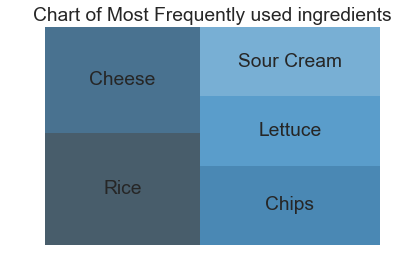

In [29]:
item_df = pd.DataFrame(item)
item_df.rename(columns={0:'Count'},inplace = True)
item_df = item_df.reset_index()
item_df.rename(columns={0:'Item'},inplace = True)
item_df

sb.set_context("poster")

squarify.plot(sizes=item_df['Count'],label = item_df['Item'], color = col, alpha = 0.9)
plt.axis('off')
plt.title("Chart of Most Frequently used ingredients")
plt.show()